In [1]:
!pip install scvi-tools

     |████████████████████████████████| 232 kB 4.3 MB/s 
     |████████████████████████████████| 713 kB 43.3 MB/s 
     |████████████████████████████████| 397 kB 30.2 MB/s 
     |████████████████████████████████| 813 kB 26.5 MB/s 
     |████████████████████████████████| 217 kB 42.6 MB/s 
     |████████████████████████████████| 91 kB 9.8 MB/s 
     |████████████████████████████████| 829 kB 41.2 MB/s 
     |████████████████████████████████| 636 kB 41.7 MB/s 
     |████████████████████████████████| 133 kB 51.9 MB/s 
     |████████████████████████████████| 1.1 MB 36.5 MB/s 
     |████████████████████████████████| 51 kB 7.6 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 271 kB 48.8 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 144 kB 50.4 MB/s 
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19896 sha256=37e5e697793685199bac29f8b504ac9140b4838e393865d0534110

In [2]:
import sys

#if branch is stable, will install via pypi, else will install from source
branch = "stable"
IN_COLAB = "google.colab" in sys.modules

if IN_COLAB and branch == "stable":
    !pip install --quiet scvi-tools[tutorials]
elif IN_COLAB and branch != "stable":
    !pip install --quiet --upgrade jsonschema
    !pip install --quiet git+https://github.com/yoseflab/scvi-tools@$branch#egg=scvi-tools[tutorials]

     |████████████████████████████████| 2.0 MB 4.2 MB/s 
     |████████████████████████████████| 8.8 MB 18.1 MB/s 
     |████████████████████████████████| 1.4 MB 21.2 MB/s 
     |████████████████████████████████| 41 kB 110 kB/s 
     |████████████████████████████████| 48 kB 4.7 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 1.1 MB 36.8 MB/s 
     |████████████████████████████████| 3.1 MB 31.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scvi
import scanpy as sc
import tensorflow as tf

sc.set_figure_params(figsize=(4, 4))

Global seed set to 0
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.listdir('/content/drive/MyDrive/UMINTv2/Data_Labels/preprocessedData/bmcite30k/')

['bmcite30k_rna_scaled.csv',
 'bmcite30k_rna.h5Seurat',
 'bmcite30k_rna.h5ad',
 'bmcite30k_adt_scaled.csv',
 'bmcite30k_adt.h5Seurat',
 'bmcite30k_adt.h5ad']

In [7]:
dir = '/content/drive/MyDrive/UMINTv2/Data_Labels/preprocessedData/bmcite30k/'
dir1 = '/content/drive/MyDrive/UMINTv2/Data_Labels/Labels/'

In [8]:
bmcite_rna = sc.read(dir+'bmcite30k_rna.h5ad')
bmcite_rna

AnnData object with n_obs × n_vars = 30672 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'

In [10]:
bmcite_adt = sc.read(dir+'bmcite30k_adt.h5ad')
bmcite_adt

AnnData object with n_obs × n_vars = 30672 × 25
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: 'features'

In [11]:
bmcite_rna.var.head()

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable
HES4,0.009292,0.016379,0.010437,1.569335,1
ISG15,0.186033,0.370594,0.301503,1.229158,1
TNFRSF18,0.015780,0.022313,0.017734,1.258177,1
TNFRSF4,0.028593,0.039318,0.033297,1.180825,1
MRPL20,0.376989,1.033872,0.814367,1.269540,1


In [14]:
temp_rna = bmcite_rna.X
temp_adt = bmcite_adt.X

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
temp_rna = scaler.fit_transform(temp_rna)
temp_adt = scaler.fit_transform(temp_adt)

In [16]:
# scvi needs one adata, so we merge rna and cite
adata = bmcite_rna
adata.layers["counts"] = temp_rna
adata.obsm['proteins'] = temp_adt

In [17]:
adata

AnnData object with n_obs × n_vars = 30672 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'proteins'
    layers: 'counts'

In [18]:
adata.obsm['proteins'].shape

(30672, 25)

In [19]:
scvi.data.setup_anndata(adata, layer="counts", protein_expression_obsm_key='proteins')

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Using protein expression from adata.obsm['proteins']                                
INFO     Generating sequential protein names                                                 
INFO     Successfully registered anndata object containing 30672 cells, 2000 vars, 1 batches,
         1 labels, and 25 proteins. Also registered 0 extra categorical covariates and 0     
         extra continuous covariates.                                                        
INFO     Please do not further modify adata until model is trained.                          


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function setup_anndata is deprecated; Please use the model-specific setup_anndata methods instead. The global method will be removed in version 0.15.0.
  warnings.warn(msg, category=FutureWarning)


In [20]:
vae = scvi.model.TOTALVI(adata)

INFO     Computing empirical prior initialization for protein background.                    


/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."
/usr/local/lib/python3.7/dist-packages/scvi/model/_totalvi.py:1041: UserWarning: Make sure the registered protein expression in anndata contains unnormalized count data.
  "Make sure the registered protein expression in anndata contains unnormalized count data."


In [21]:
with tf.device('/GPU:0'):
  vae.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scvi/distributions/_negative_binomial.py:533: UserWarning: The value argument must be within the support of the distribution
  UserWarning,


Epoch 400/400: 100%|██████████| 400/400 [24:47<00:00,  3.72s/it, loss=240, v_num=1]


In [23]:
adata.obsm["X_totalVI"] = vae.get_latent_representation()

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."
/usr/local/lib/python3.7/dist-packages/scvi/model/_totalvi.py:1041: UserWarning: Make sure the registered protein expression in anndata contains unnormalized count data.
  "Make sure the registered protein expression in anndata contains unnormalized count data."


In [24]:
sc.pp.neighbors(adata, use_rep="X_totalVI")
sc.tl.umap(adata, min_dist=0.4)
sc.tl.leiden(adata, key_added="leiden_totalVI")

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(numpy, value)):
/usr/local/lib/python3.7/dist-packages/numba/co

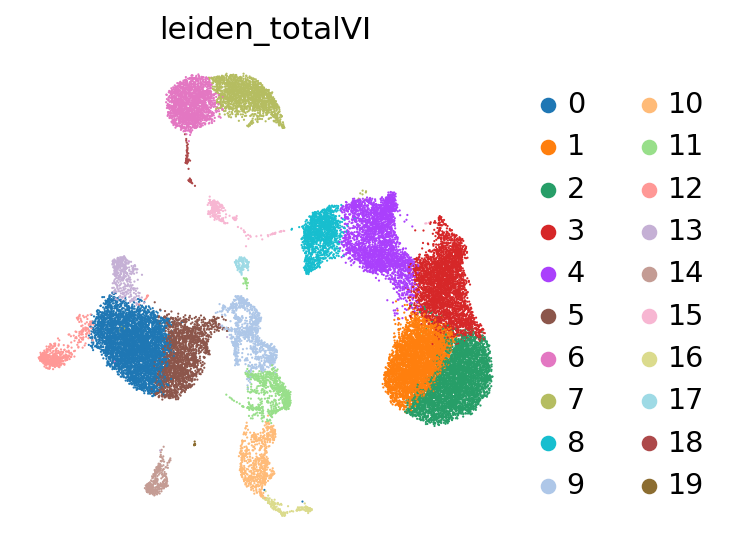

In [25]:
sc.pl.umap(
    adata,
    color=["leiden_totalVI"],
    frameon=False,
    ncols=1,
)

In [26]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,_scvi_batch,_scvi_labels,leiden_totalVI
a_AAACCTGAGCTTATCG-1,0,7546.0,2136,0,0,10
a_AAACCTGAGGTGGGTT-1,0,1029.0,437,0,0,3
a_AAACCTGAGTACATGA-1,0,1111.0,429,0,0,2
a_AAACCTGCAAACCTAC-1,0,2741.0,851,0,0,3
a_AAACCTGCAAGGTGTG-1,0,2099.0,843,0,0,0
...,...,...,...,...,...,...
b_TTTGTCATCCGAGCCA-1,1,3000.0,895,0,0,3
b_TTTGTCATCCGTAGGC-1,1,2230.0,649,0,0,3
b_TTTGTCATCCTCGCAT-1,1,4259.0,1457,0,0,12
b_TTTGTCATCGCCGTGA-1,1,2648.0,733,0,0,1


In [27]:
bmcite30k_labels_totalVI = adata.obs['leiden_totalVI']

In [28]:
bmcite30k_labels_totalVI.to_csv(dir1+'bmcite30k/bmcite30k_labels_totalVI.csv')